## Data Science Bootcamp Homework 8
**-by Amaan Elahi (ae2950)**

### **Logistic Regression**

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to binary classification (e.g., Setosa vs Not Setosa)
y_binary = (y == 0).astype(int)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model prediction on different K values**

In [3]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.1)
for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    print(f"Threshold: {t:.1f}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred), "\n")


Threshold: 0.1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0 

Threshold: 0.2
Accuracy: 1.0
Precision: 1.0
Recall: 1.0 

Threshold: 0.3
Accuracy: 1.0
Precision: 1.0
Recall: 1.0 

Threshold: 0.4
Accuracy: 1.0
Precision: 1.0
Recall: 1.0 

Threshold: 0.5
Accuracy: 1.0
Precision: 1.0
Recall: 1.0 

Threshold: 0.6
Accuracy: 1.0
Precision: 1.0
Recall: 1.0 

Threshold: 0.7
Accuracy: 1.0
Precision: 1.0
Recall: 1.0 

Threshold: 0.8
Accuracy: 1.0
Precision: 1.0
Recall: 1.0 



**ROC Curve Plot**

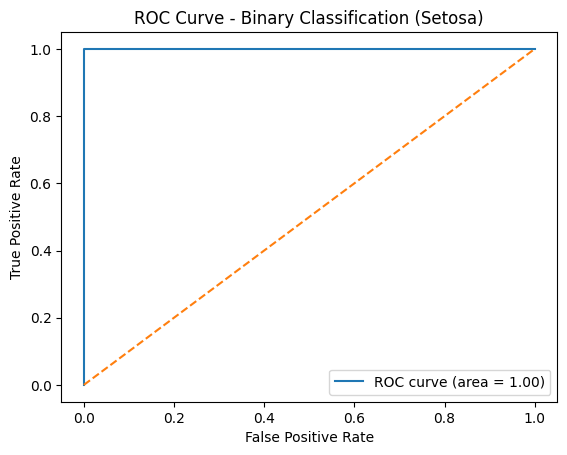

In [4]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification (Setosa)')
plt.legend()
plt.show()


### **Clustering on Iris dataset**

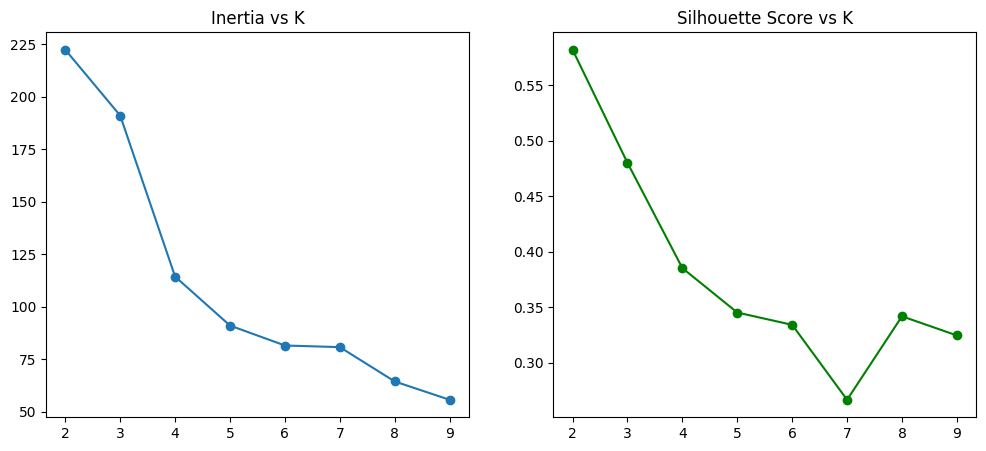

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_scaled = scaler.fit_transform(X)

inertias = []
silhouettes = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# Plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title("Inertia vs K")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='green')
plt.title("Silhouette Score vs K")
plt.show()



**Q1 : How do the inertia and silhouette scores change?**

- **Inertia** steadily **decreases** as the number of clusters **k increases**, which is expected—more clusters generally result in tighter groups and hence lower inertia (i.e., smaller within-cluster variance).
- **Silhouette Score** shows a **peak at lower values of k (especially k=2)** and then **gradually declines** as k increases. This implies that data points are better clustered (i.e., more well-separated and cohesive) when there are fewer clusters.

---


**Q2 : What if you don't scale your features?**

- Without scaling, clustering results can be **biased by features with larger numerical ranges**.
- In the Iris dataset, since feature ranges are relatively similar, the **difference between scaled and unscaled clustering is not dramatic**, but:
  - **Inertia may still be lower after scaling**, as the model can better balance distances.
  - **Silhouette scores** are generally more stable and higher with scaling, particularly when features vary significantly in magnitude (not a huge issue in Iris, but critical in real-world datasets like food nutrients).

---


**Q3 : Is there a 'right' k? Why or why not?**

- There is **no single 'right' k**, but:
  - From the **elbow method** (inertia plot), **k=3** seems like a good trade-off point where inertia stops dropping sharply—suggesting 3 clusters capture most structure.
  - From the **silhouette plot**, **k=2** yields the **highest score**, implying the most distinct clustering.
- In the context of the **Iris dataset**, where we know there are **3 true classes**, **k=3** is often chosen as the best practical value.
- However, the "right" k **depends on the goal**:
  - If interpretability or separation is more important: choose k with highest silhouette score.
  - If preserving known class structure: align with domain knowledge (e.g., 3 flower types in Iris).
